In [2]:
import numpy as np
from cosmoTransitions import generic_potential
import matplotlib.pyplot as plt
import pandas as pd
from scipy import optimize
import scipy.integrate as integrate
import random
from scipy import interpolate, special
import seaborn as sns
from scipy import misc


%config InlineBackend.figure_format = 'retina'
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rcParams["figure.figsize"] = (8, 6)  #set default figure size



####Some definitions##
v2 = 246.2**2
mh=125.09
v=246.2
alpha=1/137
sinthw=np.sqrt(0.223)
g1=np.sqrt(4*np.pi*alpha/(1-sinthw**2))
g=np.sqrt(4*np.pi*alpha)/sinthw
Mplanck=2.4*10**18
cs=1/3**0.5 ##Sound speed constant


####This code uses an interpoaltion function for the number of degrees of freedom as function of temperature
###Data is obtained from https://member.ipmu.jp/satoshi.shirai/EOS2018
#data = np.loadtxt( 'satoshi_dof.dat' )[500:3900]
#Temperature_d=(data.T)[0]
#dof_d=(data.T)[1]#relativistic degrees of freedom  
#dof_s=(data.T)[3]#entropic degrees of freedom
#g_star = interpolate.interp1d(Temperature_d, dof_d, kind='cubic')
#g_star_s = interpolate.interp1d(Temperature_d, dof_s, kind='cubic')


class model1(generic_potential.generic_potential):
    def init(self, mpi=10, fvev=400,ms=300,Ms=1000):
        self.mpi=mpi
        self.fvev=fvev
        self.lam=mpi**2/fvev**2
        self.Ndim = 1
        


    def forbidPhaseCrit(self, X):
        return any([np.array([X])[...,0] < -5.0])
        #return any([np.array([X])[...,0] < -5.0, np.array([X])[...,1] < -5.0])

    def V0(self, X):
        X = np.asanyarray(X)
        h= X[...,0]
        pot = -h**2/2*self.mpi**2 + h**4*self.lam/4
        return pot

    def boson_massSq(self, X, T):
        X = np.array(X)
        h = X[...,0]
        
        mh=-self.mpi**2+3*h**2*self.mpi**2/self.fvev**2
        mGB=-self.mpi**2+h**2*self.mpi**2/self.fvev**2


        M = np.array([mh,mGB])
        M = np.rollaxis(M, 0, len(M.shape))

        dof = np.array([1,2]) ##Longitudinal at the end
        c = np.array([1.5,1.5])

        return M, dof, c



    def approxZeroTMin(self):
        # There are generically two minima at zero temperature in this model,
        # and we want to include both of them.

        return [np.array([self.fvev])]

In [3]:
m=model1(mpi=125/2, fvev=246)

In [4]:
m.Vtot([100],100)

-54382138.40109493

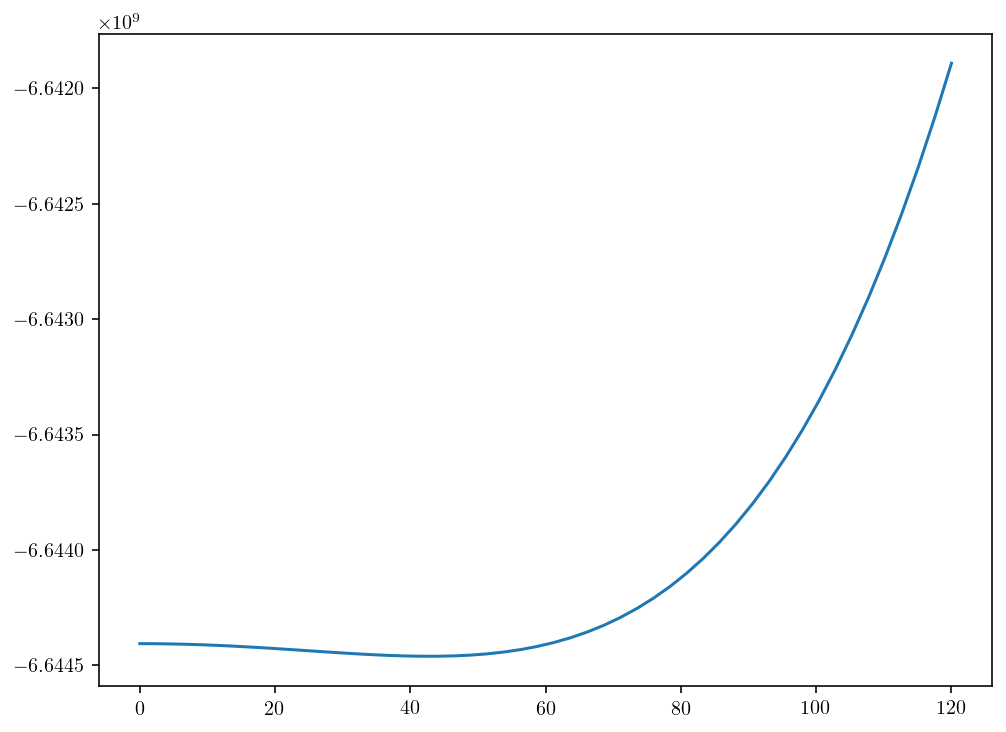

In [39]:
h_range=np.linspace(0,120)
V_range=[m.Vtot([h],376) for h in h_range]
plt.plot(h_range,V_range)
plt.show()

In [41]:
m.findAllTransitions()

Tracing phase starting at x = [247.80697852] ; t = 0.0
Tracing minimum up
traceMinimum t0 = 0
....................................................................................................................
Tracing phase starting at x = [140.4156728] ; t = 313.0698789482606
Tracing minimum down
traceMinimum t0 = 313.07
...................................................................................................................................
Tracing minimum up
traceMinimum t0 = 313.07
....................................................................................................................................................................................................................................


[]

In [42]:
m.phases

{1: Phase(key=1, X=[[247.8], ..., [-5.551e-17]], T=[0, ..., 1000], dXdT=[[-0], ..., [0.0004118]]}

In [44]:
m.renormScaleSq

1000000.0